In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns 
from sklearn.datasets import load_sample_image

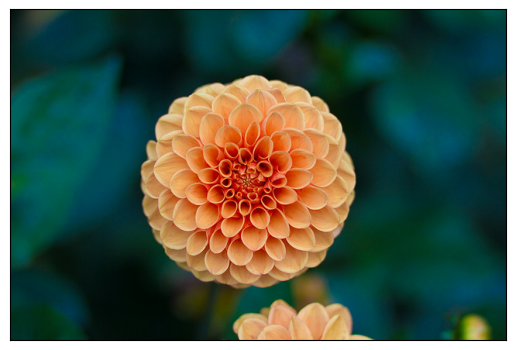

In [37]:
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [38]:
china.shape

(427, 640, 3)

In [39]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [40]:
data = china/255.0
data

array([[[0.00784314, 0.0745098 , 0.05098039],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.30196078, 0.25098039],
        [0.        , 0.29803922, 0.25098039],
        [0.        , 0.29411765, 0.24705882]],

       [[0.00392157, 0.07058824, 0.04705882],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.        , 0.29803922, 0.25098039],
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.25490196]],

       [[0.00784314, 0.06666667, 0.04705882],
        [0.02352941, 0.0745098 , 0.04705882],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.2627451 ],
        [0.00392157, 0.29019608, 0.2627451 ]],

       ...,

       [[0.        , 0.18039216, 0.15686275],
        [0.00392157, 0.18823529, 0.15686275],
        [0.00392157, 0

In [41]:
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [42]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [45]:
def plot_pixels(data,title,colors= None,N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R ,G ,B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].scatter(R,G,color = colors,marker = '.')
    ax[0].set(xlabel='Red',ylabel='Blue',xlim = (0,1),ylim= (0,1))

    ax[1].scatter(R,G,color = colors,marker = '.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim = (0,1),ylim= (0,1))

    fig.suptitle(title,size=20)



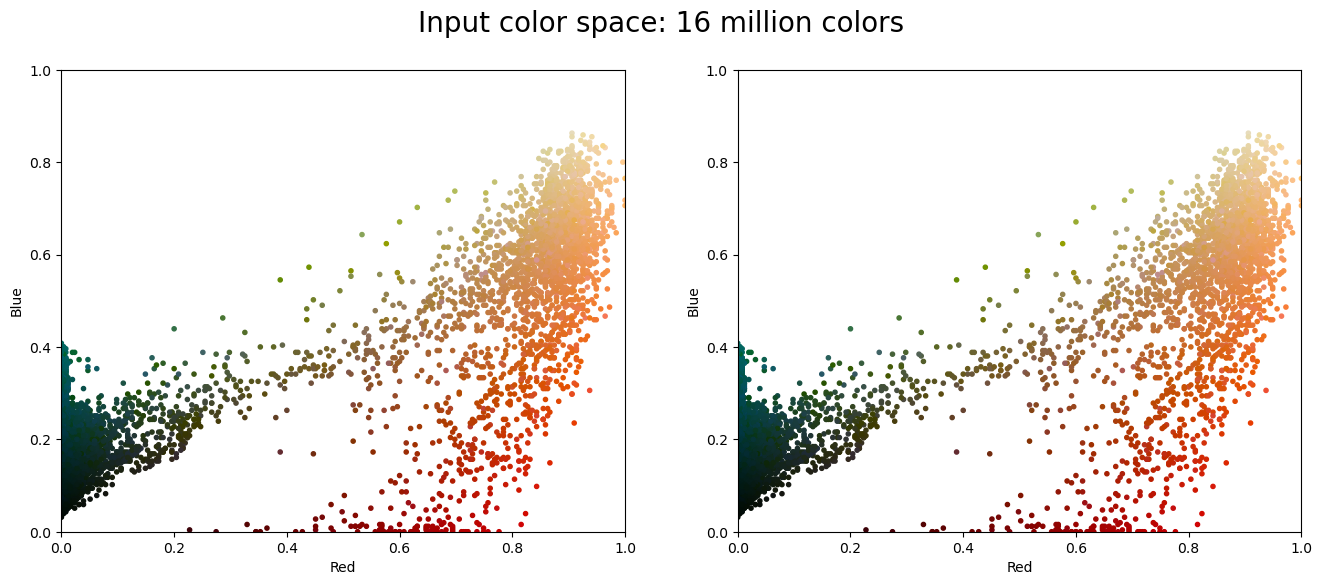

In [46]:
plot_pixels(data, title='Input color space: 16 million colors')

In [47]:
import warnings

In [48]:
warnings.simplefilter('ignore')

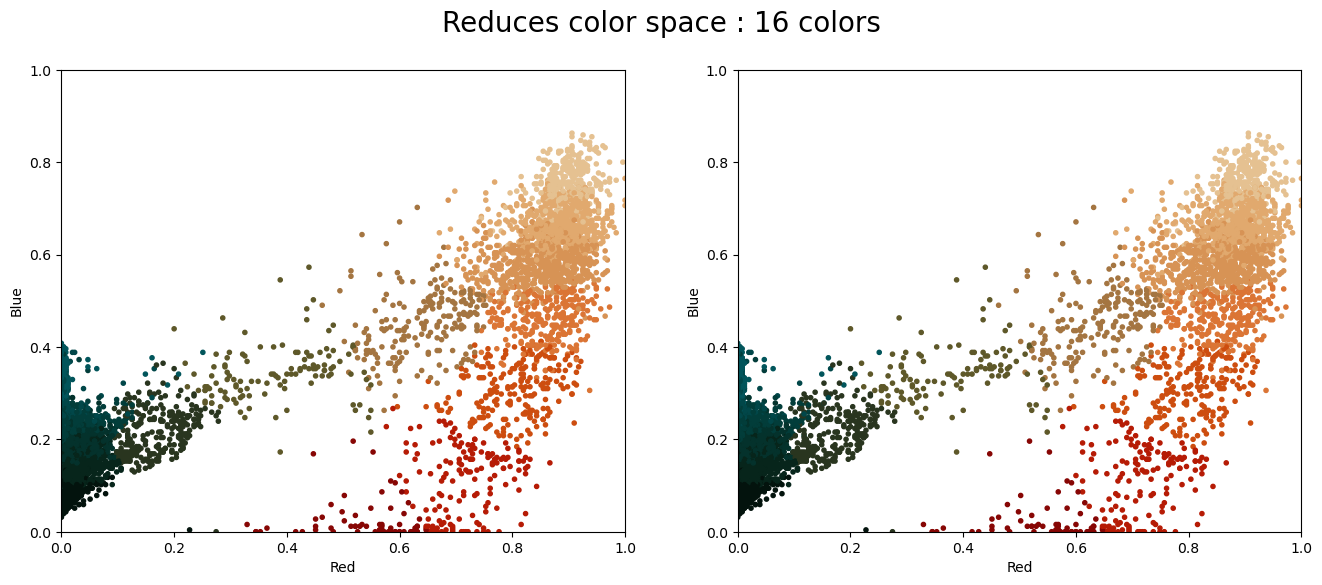

In [49]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="Reduces color space : 16 colors")

Text(0.5, 1.0, 'Recolored')

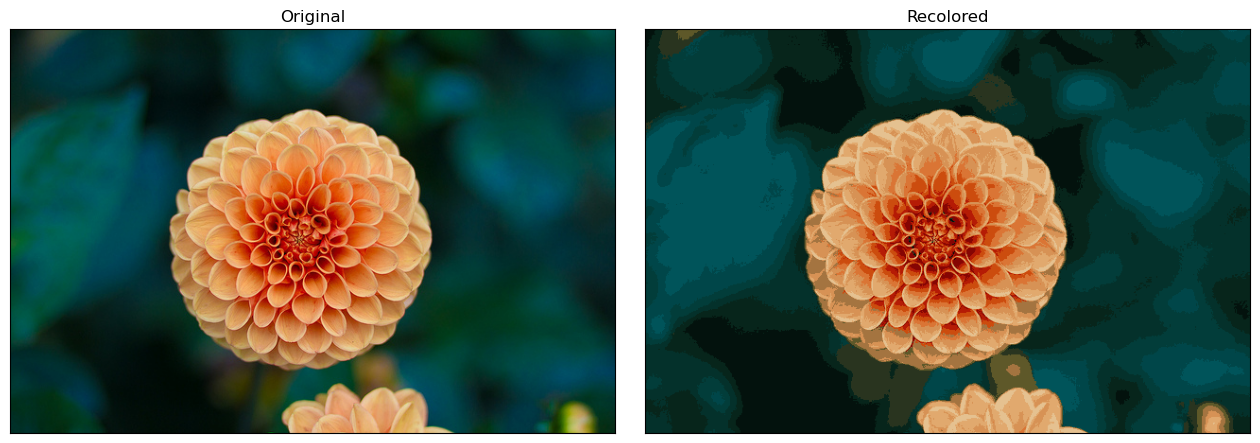

In [50]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1,2, figsize=(16,6),subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original')
ax[1].imshow(china_recolored)
ax[1].set_title('Recolored')